In [1]:
# -*- coding: utf-8 -*-

"""
Use this file for your answers. 

This file should been in the root of the repository 
(do not move it or change the file name) 

"""

import numpy as np
import matplotlib.pyplot as plt
import math
import tqdm


def lml(alpha,beta,Phi,Y):
    N = np.shape(Y)[0]

    first_term = -(N/2.0)*np.log(2*np.pi)

    matrix = alpha*np.dot(Phi,Phi.T)+beta*np.identity(N)
    
    second_term = -0.5* np.log(np.linalg.det(matrix))

    inv = np.linalg.inv(matrix)
    dot = np.dot(Y.T,inv)
    third_term = float(- 0.5*np.dot(dot,Y))

    return(first_term+second_term+third_term)

def grad_lml(alpha, beta, Phi, Y):
    
    N = np.shape(Y)[0]
    matrix = alpha*np.dot(Phi,Phi.T)+beta*np.identity(N)
    inv = np.linalg.inv(matrix)
    
    
    dotA = np.dot(inv,np.dot(Phi,Phi.T))
    
    # alpha_derivative computation

    dot1 = np.dot(Y.T,dotA)
    dot2 = np.dot(dot1,inv)
    term_alpha_1 = 0.5 * float(np.dot(dot2,Y))

    term_alpha_2 = - 0.5 * np.trace(dotA)

    alpha_derivative = term_alpha_1 + term_alpha_2
    
    # beta_derivative computation
    
    dot_beta1 = np.dot(Y.T,inv)
    dot_beta2 = np.dot(dot_beta1,inv)
    term_beta_1 = 0.5 * float(np.dot(dot_beta2,Y))

    term_beta_2 = - 0.5 * np.trace(inv)

    beta_derivative = (term_beta_1 + term_beta_2)
    
    return(np.array([alpha_derivative,beta_derivative]))



# Question b

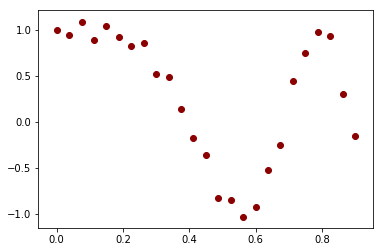

In [2]:
N = 25
X_training = np.reshape(np.linspace(0, 0.9, N), (N, 1))
Y_training = np.cos(10*X_training**2) + 0.1 * np.sin(100*X_training)
plt.scatter(X_training,Y_training,color='darkred')

y = np.matrix(Y_training)

x_pred = np.linspace(-0.3, 1.3, 200)

In [3]:
def phi(x,order):
    return(x**order)

M = 2
phi1 = []
for i in range(len(X_training)):
    line = []
    for m in range(M):
        line += [phi(X_training[i][0],m)]
    phi1 += [line]
phi1 = np.array(phi1)

def ML_b(alpha_beta):
    return lml(alpha_beta[0],alpha_beta[1],phi1,Y_training)

def grad_ML_b(alpha_beta):
    return grad_lml(alpha_beta[0],alpha_beta[1],phi1,Y_training)

Gradient descent terminated at the iteration 368


Text(0,0.5,'beta')

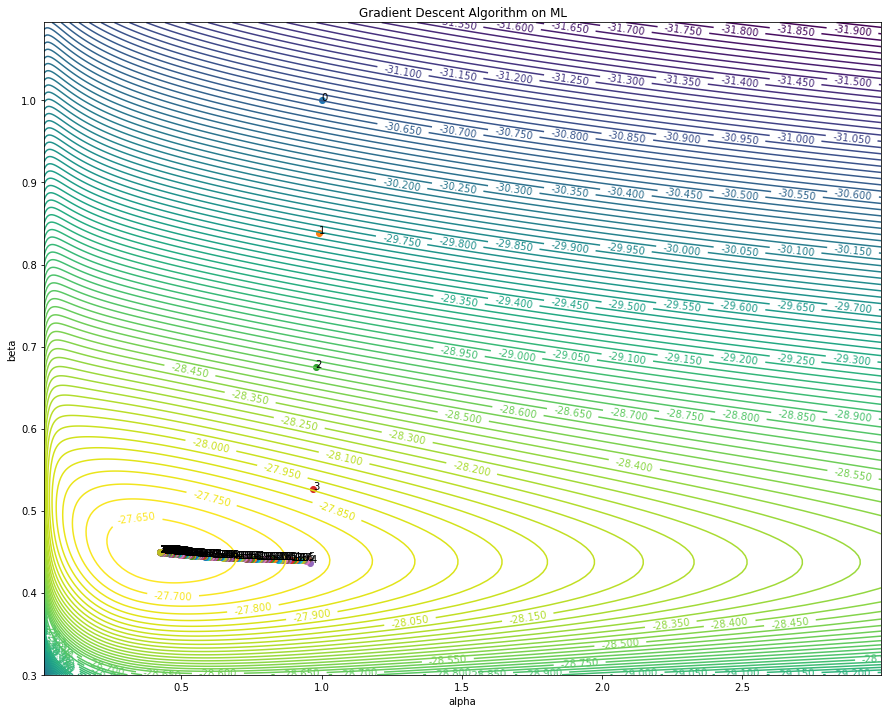

In [14]:
Xs = [ np.array([1.0,1.0]) ]

epsilon = 0.000001
step_size = 0.025

for step in range(1000):
    if np.linalg.norm(grad_ML_b(Xs[step])) > epsilon :
        Xs += [Xs[step] + step_size*grad_ML_b(Xs[step])]
    else:
        print("Gradient descent terminated at the iteration "+str(step))
        break
Ys = []
for X in Xs:
    Ys += [ML_b(X)]

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.005
x = np.arange(0.01, 3.0, delta)
y = np.arange(0.3, 1.1, delta)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(y)):
    line = []
    for j in range(len(x)):
        line += [ML_b(np.array([x[j],y[i]]))]
    Z += [line]
Z = np.array(Z)

fig, ax = plt.subplots(figsize = (15,12))
CS = ax.contour(X, Y, Z ,100)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gradient Descent Algorithm on ML')
for i in range(len(Xs)):
    ax.scatter(Xs[i][0],Xs[i][1])
    ax.annotate(str(i),(Xs[i][0],Xs[i][1]))
plt.xlabel('alpha')
plt.ylabel('beta')

In [10]:
print(Xs[-1])
print(ML_b(Xs[-1]))

[0.42455543 0.44923131]
-27.60879462920308


In [6]:
from scipy.optimize import minimize


In [23]:
x0 = np.array([1.0,2.0])
res = minimize(ML_b, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 27.608795
         Iterations: 75
         Function evaluations: 151
[0.42455483 0.44923134]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


# Question C

In [3]:
def trigo(x,order):
    if order == 0:
        return(1.0)
    elif order%2 == 0 :
        return(np.cos(math.pi*order*x))
    elif order%2 == 1 :
        return(np.sin(math.pi*(order+1)*x))

In [4]:
order = 11
M = 2*order + 1
phi1 = []
for i in range(len(X_training)):
    line = []
    for m in range(M):
        line += [trigo(X_training[i][0],m)]
    phi1 += [line]
phi1 = np.array(phi1)

def ML_b(alpha_beta):
    return lml(alpha_beta[0],alpha_beta[1],phi1,Y_training)

def grad_ML_b(alpha_beta):
    return grad_lml(alpha_beta[0],alpha_beta[1],phi1,Y_training)

In [5]:
def neg_ML_b(alpha_beta):
    return -ML_b(alpha_beta)

from scipy.optimize import minimize
x0 =  np.array([0.05,0.01]) 
res = minimize(neg_ML_b, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: -63709475533390.257812
         Iterations: 140
         Function evaluations: 302
[3.66672668e-02 1.84064062e-18]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


Text(0,0.5,'beta')

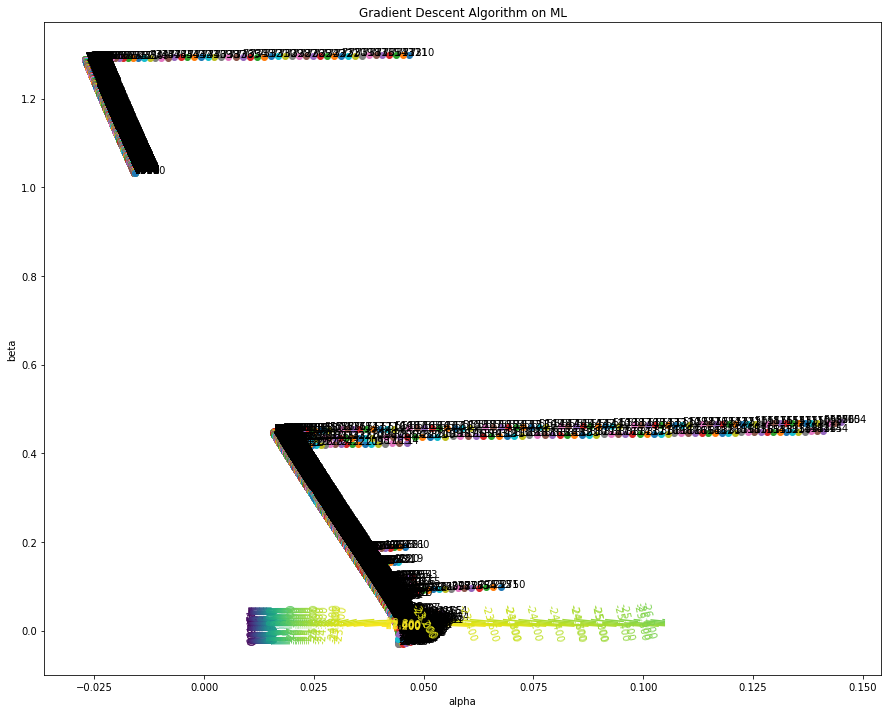

In [6]:
Xs = [ np.array([0.05,0.01]) ]

epsilon = 0.000001
step_size = 0.00003

for step in range(10000):
    if np.linalg.norm(grad_ML_b(Xs[step])) > epsilon :
        Xs += [Xs[step] + step_size*grad_ML_b(Xs[step])]
    else:
        print("Gradient descent terminated at the iteration "+str(step))
        break
Ys = []
for X in Xs:
    Ys += [ML_b(X)]

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.005
x = np.arange(0.01, 0.11, delta)
y = np.arange(0.01, 0.03, delta)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(y)):
    line = []
    for j in range(len(x)):
        line += [ML_b(np.array([x[j],y[i]]))]
    Z += [line]
Z = np.array(Z)

fig, ax = plt.subplots(figsize = (15,12))
CS = ax.contour(X, Y, Z ,100)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gradient Descent Algorithm on ML')
for i in range(len(Xs)):
    ax.scatter(Xs[i][0],Xs[i][1])
    ax.annotate(str(i),(Xs[i][0],Xs[i][1]))
plt.xlabel('alpha')
plt.ylabel('beta')

In [ ]:
print(Xs[-1])
print(ML_b(Xs[-1]))

In [ ]:
print(res.x)

# Question D

In [4]:
def gaussians(x):
    scale = 0.1
    results = []
    for mean in np.linspace(-0.5, 1, 10):
        results += [
            np.exp(-((x-mean)*(x-mean))/(2*scale*scale))
        ]
    return(results)

In [5]:
phi =[]
for i in range(len(X_training)):
    line = [1.0]
    for m in range(10):
        line += [gaussians(X_training[i][0])[m]]
    phi += [line]
phi  = np.array(phi)
np.shape(phi)

(25, 11)

In [6]:
S = np.linalg.inv(10.0*np.dot(phi.T,phi)+np.identity(11))
M = np.dot(S,10.0*np.dot(phi.T,Y_training))
M = np.reshape(M,(11,))

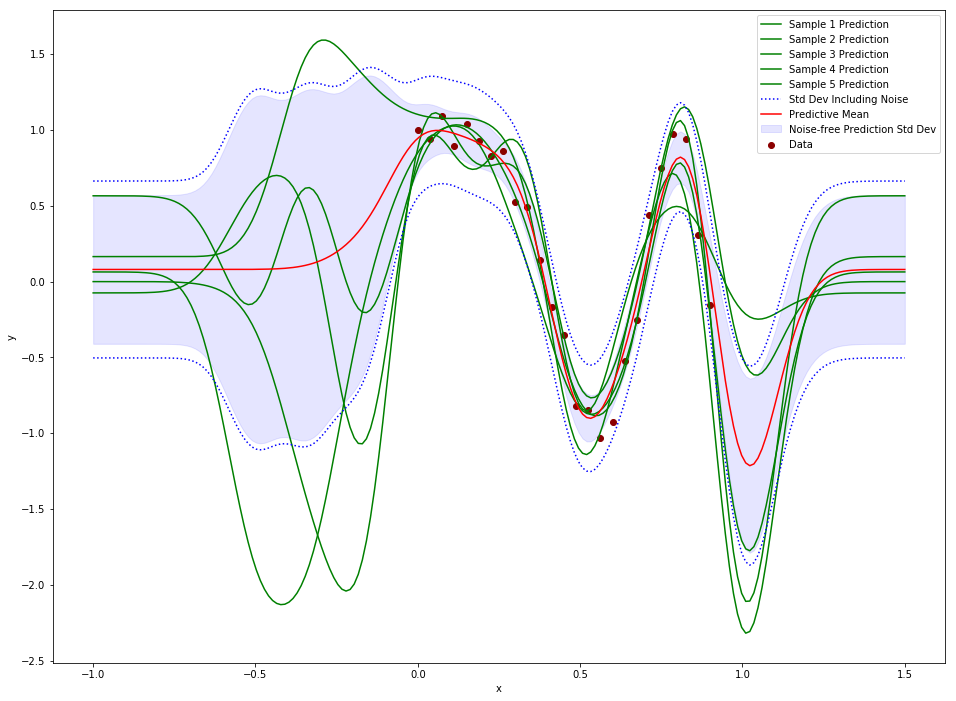

In [33]:
w1 = np.random.multivariate_normal(M,S)
w2 = np.random.multivariate_normal(M,S)
w3 = np.random.multivariate_normal(M,S)
w4 = np.random.multivariate_normal(M,S)
w5 = np.random.multivariate_normal(M,S)

def pm(x):
    return(np.dot(M.T,np.array([[1.0]+gaussians(x)]).T)[0])

def std_(x):
    phix = np.array([[1.0]+gaussians(x)]).T
    return(np.sqrt(np.abs(np.dot(np.dot(phix.T,S),phix)[0][0])))

def pw1(x):
    return(np.dot(w1,np.array([[1.0]+gaussians(x)]).T)[0])

def pw2(x):
    return(np.dot(w2,np.array([[1.0]+gaussians(x)]).T)[0])

def pw3(x):
    return(np.dot(w3,np.array([[1.0]+gaussians(x)]).T)[0])

def pw4(x):
    return(np.dot(w4,np.array([[1.0]+gaussians(x)]).T)[0])

def pw5(x):
    return(np.dot(w5,np.array([[1.0]+gaussians(x)]).T)[0])

Xs_star = np.linspace(-1.0, 1.5, 200)
pred_mean = []
pred_std_plus = []
pred_std_minus = []
pred_w1 = []
pred_w2 = []
pred_w3 = []
pred_w4 = []
pred_w5 = []
err_plus = [] 
err_minus = []

for x_ in Xs_star:
    pred_mean     += [pm(x_)]
    pred_std_plus += [pm(x_)+std_(x_)]
    pred_std_minus+= [pm(x_)-std_(x_)]
    err_plus += [pm(x_)+np.sqrt(std_(x_)*std_(x_)+0.1)]
    err_minus+= [pm(x_)-np.sqrt(std_(x_)*std_(x_)+0.1)]
    pred_w1 += [pw1(x_)]
    pred_w2 += [pw2(x_)]
    pred_w3 += [pw3(x_)]
    pred_w4 += [pw4(x_)]
    pred_w5 += [pw5(x_)]

plt.figure(1,figsize=(16,12))
plt.plot(Xs_star,pred_w1,color = 'green',label = 'Sample 1 Prediction')
plt.plot(Xs_star,pred_w2,color = 'green',label = 'Sample 2 Prediction')
plt.plot(Xs_star,pred_w3,color = 'green',label = 'Sample 3 Prediction')
plt.plot(Xs_star,pred_w4,color = 'green',label = 'Sample 4 Prediction')
plt.plot(Xs_star,pred_w5,color = 'green',label = 'Sample 5 Prediction')
plt.plot(Xs_star,err_plus,color = 'blue',linestyle = ':',label = 'Std Dev Including Noise')
plt.plot(Xs_star,err_minus,color = 'blue',linestyle = ':')
plt.plot(Xs_star,pred_mean,color = 'red',label = 'Predictive Mean')
plt.fill_between(Xs_star,pred_std_minus,pred_std_plus,color='blue',alpha=0.1,label = 'Noise-free Prediction Std Dev')
plt.scatter(X_training,Y_training,color='darkred',label = 'Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
